<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [10]:
!pip install pandas
!pip install matplotlib

Import pandas module


In [11]:
import pandas as pd


Import matplotlib


In [12]:
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [13]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/UDKAZw-kz18Yj8P6icf_qw/survey-data-duplicates.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [14]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [15]:
## Write your code here
# Count the number of duplicate rows
num_duplicates = df.duplicated().sum()
print(num_duplicates)

# Display the first few duplicate rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows.head())

10
       ResponseId                      MainBranch                 Age  \
65437           1  I am a developer by profession  Under 18 years old   
65438           2  I am a developer by profession     35-44 years old   
65439           3  I am a developer by profession     45-54 years old   
65440           4           I am learning to code     18-24 years old   
65441           5  I am a developer by profession     18-24 years old   

                Employment RemoteWork   Check  \
65437  Employed, full-time     Remote  Apples   
65438  Employed, full-time     Remote  Apples   
65439  Employed, full-time     Remote  Apples   
65440   Student, full-time        NaN  Apples   
65441   Student, full-time        NaN  Apples   

                                        CodingActivities  \
65437                                              Hobby   
65438  Hobby;Contribute to open-source projects;Other...   
65439  Hobby;Contribute to open-source projects;Other...   
65440                  

### Task 2: Analyze Characteristics of Duplicates
1. Identify which columns have the same values in duplicate rows.
2. Analyze the distribution of duplicates across different columns such as Country, Employment, and DevType.


In [16]:
## Write your code here
# Identify columns with the same values in duplicate rows
duplicate_columns = df[df.duplicated()].apply(lambda row: row.unique(), axis=0)

# Analyze the distribution of duplicates across different columns
country_dist = df[df.duplicated()]['Country'].value_counts()
employment_dist = df[df.duplicated()]['Employment'].value_counts()
devtype_dist = df[df.duplicated()]['DevType'].value_counts()

# Print the results
print("Columns with same values in duplicate rows:")
print(duplicate_columns)

print("\nDistribution of duplicates by Country:")
print(country_dist)

print("\nDistribution of duplicates by Employment:")
print(employment_dist)

print("\nDistribution of duplicates by DevType:")
print(devtype_dist)


Columns with same values in duplicate rows:
ResponseId                               [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
MainBranch             [I am a developer by profession, I am learning...
Age                    [Under 18 years old, 35-44 years old, 45-54 ye...
Employment             [Employed, full-time, Student, full-time, Stud...
RemoteWork                                      [Remote, nan, In-person]
                                             ...                        
JobSatPoints_11                                               [nan, 0.0]
SurveyLength           [nan, Appropriate in length, Too long, Too short]
SurveyEase             [nan, Easy, Neither easy nor difficult, Diffic...
ConvertedCompYearly                                                [nan]
JobSat                                                             [nan]
Length: 114, dtype: object

Distribution of duplicates by Country:
Country
United States of America                                3
United Kingdom of Gr

### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


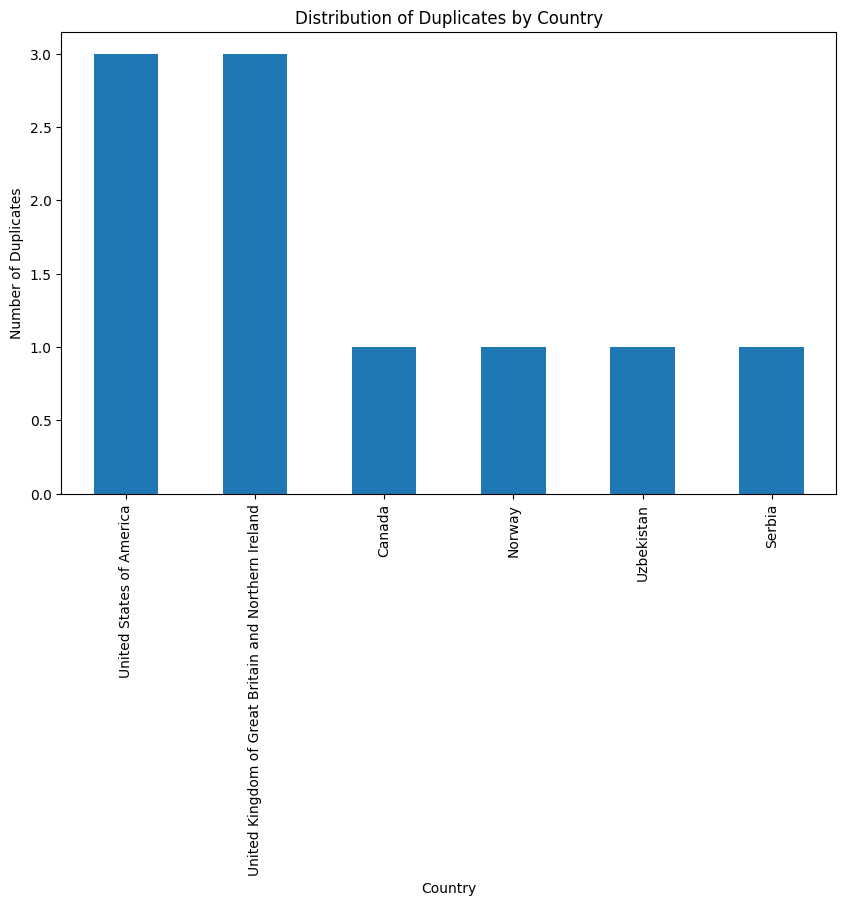

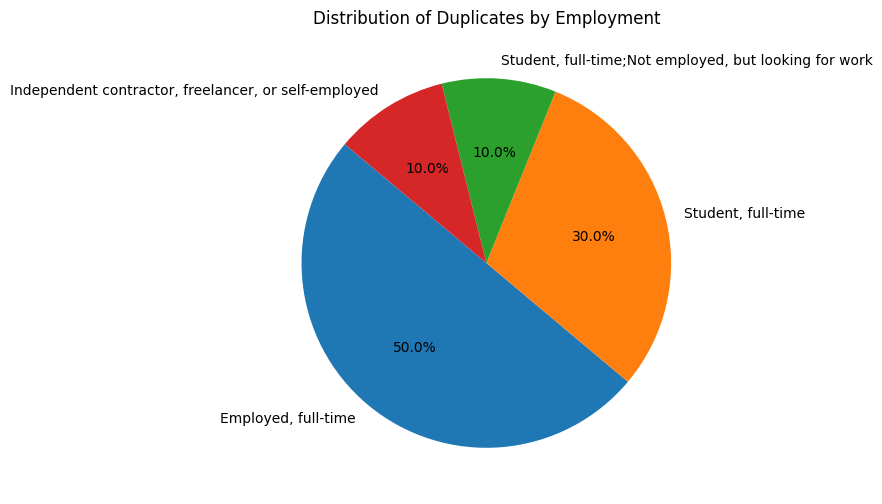

In [17]:
## Write your code here

# Visualize distribution of duplicates by Country using a bar chart
country_dist = df[df.duplicated()]['Country'].value_counts()
plt.figure(figsize=(10, 6))
country_dist.plot(kind='bar')
plt.title('Distribution of Duplicates by Country')
plt.xlabel('Country')
plt.ylabel('Number of Duplicates')
plt.show()

# Visualize distribution of duplicates by Employment using a pie chart
employment_dist = df[df.duplicated()]['Employment'].value_counts()
plt.figure(figsize=(10, 6))
employment_dist.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Duplicates by Employment')
plt.ylabel('')  # Hide y-label for pie chart
plt.show()


### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [18]:
## Write your code here
# Decide on a subset of columns that are critical for defining uniqueness
subset_columns = ['ResponseId', 'MainBranch', 'Age', 'Employment', 'Country', 'DevType']

# Remove duplicates based on the subset of columns
df_unique = df.drop_duplicates(subset=subset_columns)

# Verify the number of rows after removing duplicates
print(df_unique.shape[0])

65437


## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


# Documentation: Identifying and Removing Duplicates
### Step 1: Identify Duplicate Rows
First, we counted the number of duplicate rows in the dataset to understand the extent of duplication. We also displayed a few of the duplicate rows to get an insight into their structure.

### Step 2: Analyze Characteristics of Duplicates
Next, we analyzed which columns had the same values in the duplicate rows. Additionally, we examined the distribution of duplicates across different columns like Country, Employment, and DevType.

### Step 3: Visualize Duplicates Distribution
We created visualizations to show the distribution of duplicates across different categories. Bar charts and pie charts were used to represent the distribution of duplicates by country and employment, respectively.

### Step 4: Strategic Removal of Duplicates
Deciding which columns were critical for defining uniqueness in the dataset, we removed duplicates based on a subset of columns. This helped in retaining unique entries in the dataset.

## Conclusion
By strategically identifying and removing duplicates, we cleaned the dataset, ensuring that it only contains unique entries based on key columns. This step is crucial for maintaining the integrity and accuracy of our data analysis.

2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


When deciding which columns to use for identifying and removing duplicates, it’s essential to select rows that uniquely identify each record or are critical to the analysis. Here are the reasons for choosing each of the specific columns in this context:

## ResponseId:

This is a unique identifier for each respondent. Including this ensures that every survey participant is considered unique, which helps avoid removing genuine, unique responses.

## MainBranch:

This column represents the respondent’s primary role, which is fundamental to understanding their perspective and responses. It’s crucial for identifying duplicates to keep the data integrity intact for analysis on roles.

## Age:

Age is a significant demographic factor. Having it in the subset helps differentiate between respondents who might share other attributes but belong to different age groups, ensuring a more accurate representation of diverse age groups.

## Employment:

Employment status can vary significantly among respondents. This column helps maintain the distinction between different employment situations, which is important for any employment-related analysis.

## Country:

Country of residence is another critical demographic attribute. It ensures that responses from different countries are uniquely identified, reflecting the global diversity of the survey participants.

## DevType:

This column indicates the type of development work the respondent does. It’s important for differentiating between various developer roles and understanding the distribution of skills and roles.

# Overall Reasoning:
By selecting these specific columns, the goal was to maintain the uniqueness of each respondent while ensuring that duplicates are identified and removed accurately. These columns collectively cover unique identifiers (ResponseId), demographics (Age, Country), employment details (Employment), and role-specific information (MainBranch, DevType). This approach ensures that the data remains comprehensive and representative after removing duplicates, without losing critical information.

### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
